In [32]:
## Task 1 for one iteration (Just testing for one needle)
import random 
import time 
import math

needle_length = 0.7
space_btw_line = 1

d_btw_needle_line = random.uniform(0,space_btw_line/2)
angle_btw_needle_line = random.uniform(0,math.pi/2)

print(d_btw_needle_line,angle_btw_needle_line)

crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
print(crossing_line)
if crossing_line > d_btw_needle_line:
    print("Line Crossed")
else:
    print("Not crossed")


0.31443031232655044 0.8118547556170518
0.2539476726191702
Not crossed


In [33]:
## Task 2 for n trials
import random 
import time 
import math

needle_length = 0.7
space_btw_line = 1
trials = 100
crossed_line_count = 0

for i in range(trials):
    d_btw_needle_line = random.uniform(0,space_btw_line/2)
    angle_btw_needle_line = random.uniform(0,math.pi/2)

    # print(d_btw_needle_line,angle_btw_needle_line)

    crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
    # print(crossing_line)
    if crossing_line > d_btw_needle_line:
        crossed_line_count = crossed_line_count + 1
    else:
        continue

Probibility = crossed_line_count/trials
print(f"Probability of getting the needle crossed is {Probibility}")

Pi_estimate = (2*needle_length) / (space_btw_line*Probibility)
print(f"Pi estimated {Pi_estimate} vs Pi Actual 3.142")

Probability of getting the needle crossed is 0.41
Pi estimated 3.4146341463414633 vs Pi Actual 3.142


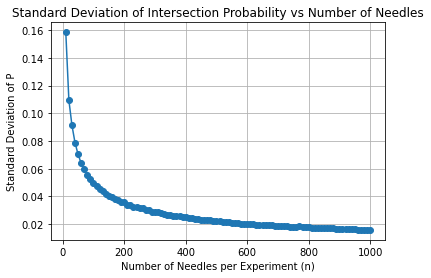

In [1]:
## Task 2 for n trials
import random 
import time 
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 100

no_of_needles = list(range(10, 1001, 10))

std_deviations = []

for n in no_of_needles:
    Probibility = []
    
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            
            d_btw_needle_line = random.uniform(0,space_btw_line/2)
            angle_btw_needle_line = random.uniform(0,math.pi/2)
        
            # print(d_btw_needle_line,angle_btw_needle_line)
        
            crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
            # print(crossing_line)
            if crossing_line > d_btw_needle_line:
                crossed_line_count = crossed_line_count + 1
            else:
                continue
        P = crossed_line_count/n
        Probibility.append(P)
        # print(f"Probability of getting the needle crossed with quantity{n} is {Probibility}")
    Std_Dev = np.std(Probibility)
    std_deviations.append(Std_Dev)

plt.plot(no_of_needles, std_deviations, marker='o')
plt.title("Standard Deviation of Intersection Probability vs Number of Needles")
plt.xlabel("Number of Needles per Experiment (n)")
plt.ylabel("Standard Deviation of P")
plt.grid(True)
plt.show()

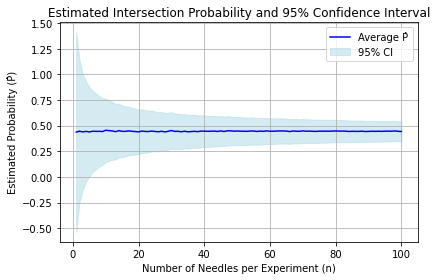

In [3]:
#task 3
import random
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 1000
no_of_needles = list(range(1, 101, 1))

avg_prob = []
lower_Prob = []
higher_Prob = []

for n in no_of_needles:
    Probabilities = []
    
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            d = random.uniform(0, space_btw_line / 2)
            angle = random.uniform(0, math.pi / 2)
            crossing_line = math.sin(angle) * (needle_length / 2)
            if crossing_line > d:
                crossed_line_count += 1

        P_hat = crossed_line_count / n
        Probabilities.append(P_hat)

    avg_p = np.mean(Probabilities)
    avg_prob.append(avg_p)

    error = 1.96 * math.sqrt((avg_p * (1 - avg_p)) / n)
    lower_Prob.append(avg_p - error)
    higher_Prob.append(avg_p + error)


plt.plot(no_of_needles, avg_prob, label='Average P̂', color='blue')
plt.fill_between(no_of_needles, lower_Prob, higher_Prob, color='lightblue', alpha=0.5, label='95% CI')
plt.title("Estimated Intersection Probability and 95% Confidence Interval")
plt.xlabel("Number of Needles per Experiment (n)")
plt.ylabel("Estimated Probability (P̂)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#task 4
import random
import math
import numpy as np
import matplotlib.pyplot as plt

needle_length = 0.7
space_btw_line = 1
trials = 1000
no_of_needles = list(range(1, 101, 1))

true_probability = (2*needle_length)/(space_btw_line*math.pi)
print("True Probability calculated ", true_probability)

outside_confidence_interval = []

for n in no_of_needles:
    outside_prob_range = 0
    for i in range(trials):
        crossed_line_count = 0
        for K in range(n):
            
            d_btw_needle_line = random.uniform(0,space_btw_line/2)
            angle_btw_needle_line = random.uniform(0,math.pi/2)
        
            # print(d_btw_needle_line,angle_btw_needle_line)
        
            crossing_line = math.sin(angle_btw_needle_line) * (needle_length/2)
            # print(crossing_line)
            if crossing_line > d_btw_needle_line:
                crossed_line_count = crossed_line_count + 1
            else:
                continue
        P = crossed_line_count/n
        #according to formula 
        error = 1.96 * math.sqrt((1/n)*P*(1-P))
        lower_val = P - error
        higher_val = P + error

        if true_probability < lower_val or true_probability > higher_val:
            outside_prob_range = outside_prob_range + 1

    ratio = outside_prob_range / trials
    outside_confidence_interval.append(ratio)
    

plt.plot(no_of_needles, outside_confidence_interval, label='Ratio Outside CI (Actual)', color='red')
plt.axhline(0.05, linestyle='--', color='gray', label='Expected 5%')
plt.title("Ratio of Times True Probability is Outside 95% CI")
plt.xlabel("Number of Needle Throws per Experiment (n)")
plt.ylabel("Proportion Outside CI")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Part 2 Anti_agents in Swarm Aggregation

Running simulation with 0% anti-agents...
Running simulation with 2% anti-agents...
Running simulation with 5% anti-agents...
Running simulation with 10% anti-agents...
Running simulation with 15% anti-agents...


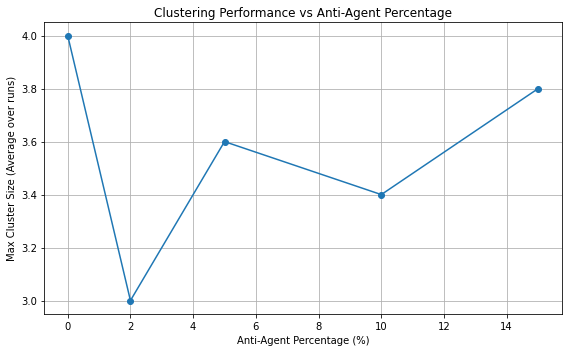

In [9]:
class Robot:
    def __init__(self, is_anti=False):
        self.x = random.randint(0, GRID_SIZE-1)
        self.y = random.randint(0, GRID_SIZE-1)
        self.carrying = False
        self.is_anti = is_anti

    def move(self):
        self.x = (self.x + random.choice([-1, 0, 1])) % GRID_SIZE
        self.y = (self.y + random.choice([-1, 0, 1])) % GRID_SIZE

    def act(self, grid):
        density = compute_density(grid, self.x, self.y)
        if not self.carrying:
            if grid[self.x][self.y] == 1:
                prob = 1 - P_pick(density) if self.is_anti else P_pick(density)
                if random.random() < prob:
                    self.carrying = True
                    grid[self.x][self.y] = 0
        else:
            if grid[self.x][self.y] == 0:
                prob = 1 - P_drop(density) if self.is_anti else P_drop(density)
                if random.random() < prob:
                    self.carrying = False
                    grid[self.x][self.y] = 1

import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt

GRID_SIZE = 100           # The grid is 100x100 cells
CELL_SIZE = 6             # Each cell is 6 pixels on screen
NUM_ROBOTS =50           # Number of robots
NUM_OBJECTS = 200         # Objects (chips) to be clustered
TICKS = 1000              # How many steps the simulation runs
ANTI_AGENT_PERCENTAGES = [0, 2, 5, 10, 15]  # % of anti-agents to test

def compute_density(grid, x, y, radius=3):
    count = 0
    for dx in range(-radius, radius+1):
        for dy in range(-radius, radius+1):
            if 0 <= x+dx < GRID_SIZE and 0 <= y+dy < GRID_SIZE:
                if grid[x+dx][y+dy] == 1:
                    count += 1
    return count / ((2*radius+1)**2)

def P_pick(density):
    return max(0.1, 1 - density)

def P_drop(density):
    return min(0.9, density)


def run_simulation(anti_percentage, run_index=0):
    pygame.init()
    screen = pygame.display.set_mode((GRID_SIZE*CELL_SIZE, GRID_SIZE*CELL_SIZE))
    pygame.display.set_caption("Object Clustering with Anti-Agents")

    # Initialize grid and robots
    grid = [[0]*GRID_SIZE for _ in range(GRID_SIZE)]
    for _ in range(NUM_OBJECTS):
        x, y = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        grid[x][y] = 1

    num_anti = int(NUM_ROBOTS * anti_percentage / 100)
    robots = [Robot(is_anti=(i < num_anti)) for i in range(NUM_ROBOTS)]

    for tick in range(TICKS):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()

        screen.fill((255, 255, 255))

        # Draw objects
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if grid[x][y] == 1:
                    pygame.draw.rect(screen, (0, 0, 0), (x*CELL_SIZE, y*CELL_SIZE, CELL_SIZE, CELL_SIZE))

        # Robots move and act
        for robot in robots:
            robot.move()
            robot.act(grid)
            color = (255, 0, 0) if robot.is_anti else (0, 0, 255)
            pygame.draw.circle(screen, color, (robot.x*CELL_SIZE+CELL_SIZE//2, robot.y*CELL_SIZE+CELL_SIZE//2), CELL_SIZE//2)

        pygame.display.flip()

    pygame.image.save(screen, f"screenshot_{anti_percentage}percent_run{run_index}.png")
    pygame.quit()


    cluster_sizes = []
    visited = np.zeros((GRID_SIZE, GRID_SIZE))

    def dfs(x, y):
        if not (0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE):
            return 0
        if grid[x][y] == 0 or visited[x][y]:
            return 0
        visited[x][y] = 1
        size = 1
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                size += dfs(x + dx, y + dy)
        return size

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x][y] == 1 and not visited[x][y]:
                cluster_sizes.append(dfs(x, y))

    return max(cluster_sizes) if cluster_sizes else 0

results = []

for percent in ANTI_AGENT_PERCENTAGES:
    print(f"Running simulation with {percent}% anti-agents...")
    repetitions = 5
    scores = [run_simulation(percent, run_index=i) for i in range(repetitions)]
    avg_score = np.mean(scores)
    results.append(avg_score)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(ANTI_AGENT_PERCENTAGES, results, marker='o')
plt.title("Clustering Performance vs Anti-Agent Percentage")
plt.xlabel("Anti-Agent Percentage (%)")
plt.ylabel("Max Cluster Size (Average over runs)")
plt.grid(True)
plt.tight_layout()
plt.show()

Running simulation with 0% anti-agents...
Running simulation with 2% anti-agents...
Running simulation with 5% anti-agents...
Running simulation with 10% anti-agents...
Running simulation with 15% anti-agents...


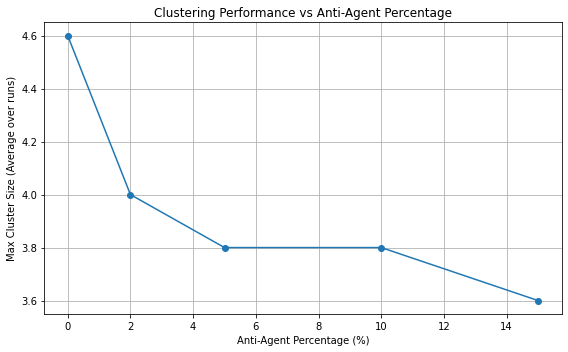

In [10]:
#Another attempt

# Code structure for Task A: Object Clustering with Anti-Agents (in Pygame)

import pygame
import random
import math
import numpy as np
import matplotlib.pyplot as plt

# Grid and simulation parameters
GRID_SIZE = 100
CELL_SIZE = 6
NUM_ROBOTS = 50
NUM_OBJECTS = 200
TICKS = 1000
ANTI_AGENT_PERCENTAGES = [0, 2, 5, 10, 15]  # Percentages of anti-agents

# Probability functions
def compute_density(grid, x, y, radius=3):
    count = 0
    for dx in range(-radius, radius+1):
        for dy in range(-radius, radius+1):
            if 0 <= x+dx < GRID_SIZE and 0 <= y+dy < GRID_SIZE:
                if grid[x+dx][y+dy] == 1:
                    count += 1
    return count / ((2*radius+1)**2)

def P_pick(density):  # lower in high-density
    return max(0.1, 1 - density)

def P_drop(density):  # higher in high-density
    return min(0.9, density)

# Robot class
class Robot:
    def __init__(self, is_anti=False):
        self.x = random.randint(0, GRID_SIZE-1)
        self.y = random.randint(0, GRID_SIZE-1)
        self.carrying = False
        self.is_anti = is_anti

    def move(self):
        self.x = (self.x + random.choice([-1, 0, 1])) % GRID_SIZE
        self.y = (self.y + random.choice([-1, 0, 1])) % GRID_SIZE

    def act(self, grid):
        density = compute_density(grid, self.x, self.y)
        if not self.carrying:
            if grid[self.x][self.y] == 1:
                prob = 1 - P_pick(density) if self.is_anti else P_pick(density)
                if random.random() < prob:
                    self.carrying = True
                    grid[self.x][self.y] = 0
        else:
            if grid[self.x][self.y] == 0:
                prob = 1 - P_drop(density) if self.is_anti else P_drop(density)
                if random.random() < prob:
                    self.carrying = False
                    grid[self.x][self.y] = 1

# Simulation function
def run_simulation(anti_percentage):
    pygame.init()
    screen = pygame.display.set_mode((GRID_SIZE*CELL_SIZE, GRID_SIZE*CELL_SIZE))
    pygame.display.set_caption("Object Clustering with Anti-Agents")

    # Initialize grid and robots
    grid = [[0]*GRID_SIZE for _ in range(GRID_SIZE)]
    for _ in range(NUM_OBJECTS):
        x, y = random.randint(0, GRID_SIZE-1), random.randint(0, GRID_SIZE-1)
        grid[x][y] = 1

    num_anti = int(NUM_ROBOTS * anti_percentage / 100)
    robots = [Robot(is_anti=(i < num_anti)) for i in range(NUM_ROBOTS)]

    for tick in range(TICKS):
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                pygame.quit()

        screen.fill((255, 255, 255))

        # Draw objects
        for x in range(GRID_SIZE):
            for y in range(GRID_SIZE):
                if grid[x][y] == 1:
                    pygame.draw.rect(screen, (0, 0, 0), (x*CELL_SIZE, y*CELL_SIZE, CELL_SIZE, CELL_SIZE))

        # Robots move and act
        for robot in robots:
            robot.move()
            robot.act(grid)
            color = (255, 0, 0) if robot.is_anti else (0, 0, 255)
            pygame.draw.circle(screen, color, (robot.x*CELL_SIZE+CELL_SIZE//2, robot.y*CELL_SIZE+CELL_SIZE//2), CELL_SIZE//2)

        pygame.display.flip()

    pygame.quit()

    # Cluster measurement: max object density
    cluster_sizes = []
    visited = np.zeros((GRID_SIZE, GRID_SIZE))

    def dfs(x, y):
        if not (0 <= x < GRID_SIZE and 0 <= y < GRID_SIZE):
            return 0
        if grid[x][y] == 0 or visited[x][y]:
            return 0
        visited[x][y] = 1
        size = 1
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                size += dfs(x + dx, y + dy)
        return size

    for x in range(GRID_SIZE):
        for y in range(GRID_SIZE):
            if grid[x][y] == 1 and not visited[x][y]:
                cluster_sizes.append(dfs(x, y))

    return max(cluster_sizes) if cluster_sizes else 0

# Main testing loop
results = []

for percent in ANTI_AGENT_PERCENTAGES:
    print(f"Running simulation with {percent}% anti-agents...")
    repetitions = 5
    scores = [run_simulation(percent) for _ in range(repetitions)]
    avg_score = np.mean(scores)
    results.append(avg_score)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(ANTI_AGENT_PERCENTAGES, results, marker='o')
plt.title("Clustering Performance vs Anti-Agent Percentage")
plt.xlabel("Anti-Agent Percentage (%)")
plt.ylabel("Max Cluster Size (Average over runs)")
plt.grid(True)
plt.tight_layout()
plt.show()
